# EDSA - Twitter Sentiment Classification

## Climate Change Belief Analysis 2022 

## Predict an individual’s belief in climate change based on historical tweet data 

# 1. Introduction:
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Our goal within this notebook is creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


Problem Domain: Climate Change

Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.

The rapid climate change we are now seeing is caused by humans using oil, gas and coal for their homes, factories and transport.

When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.



## 1.1 Problem Statement:
Build a Natural Language Processing model to classify whether or not a person believes in climate change, based on their novel tweet data.



## 1.2 Problem Framework:
Data:

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes Class Description

Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change


Key Variable definitions:

sentiment: Sentiment of tweet

message: Tweet body

tweetid: Twitter unique id

# Table of contents:

 ### Import libraries and datasets
 ### Importing the dataset
 ### Dataset Summary
    1. Closer Examination of the Target Variable, Sentiment
 ### Data Preprocessing and Engineering
    1. Create copy
    2. Hashtag extraction
    3. message cleaning
    4. Parts of speech tagging and lemmatization
    5. Word frequency
 ### Exploratory data analysis
    1. Target variable distribution
    2. message length distribution
    3. Most common words
    4. Hashtags
 ### Building classification models
    1. Train-validation split
    2. Pipelines
    3. Train models
 ### Model evaluation
    1. Random forest
    2. Naive Bayes
    3. K nearest neighbors
    4. Logistic regression
    5. Linear SVC
 ### Model Selection
 ### Hyperparameter tuning


# Import libraries and datasets

Initial step is to load libraries that we intend to use in the notebook .  

In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="55rMzKDU8ecQ4foxuBrTZzkBY",
    project_name="teammh1-exploreal",
    workspace="odenyor",
)

# Standard libraries
import re
import csv
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Downloads

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing

from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/odenyor/teammh1-exploreal/d6f5abfefb874a47804a53cd38510bad

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Importing the dataset

1. Train.csv:  Dataset that contains all the variables that should be used to train the model

2. Test.csv :  Dataset that contains variables that will be used to test the model

In [2]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#The first five rows of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Dataset summary
An overview of the raw data

In [4]:
# View the first 5 rows of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


**Step 1**: We will take a look at the shape of the dataframe to see the amount of data we are working with, the **rows** and the **columns**

In [5]:
#checking the shape of the training dataframe
train.shape
print("The training dataset has {0} rows and {1} columns".format(train.shape[0], train.shape[1]))

The training dataset has 15819 rows and 3 columns


<b>Step 2:</b> let's take a look at the data types in the dataframe using `pd.info()` to get more information about the dataframe

In [6]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<b>Step 3:</b> Let's check for any null values in the Train & Test dataset

In [7]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
test.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64



#### Closer Examination of the Target Variable, Sentiment

The following section provides a closer overview of the given data. We take a look at  the sentiment distribution of the data. This has been illustrated using graphs. 

<b>Step 1:</b> Let's take a closer look on our output label, `sentiment`.

In [9]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

**Based on the results, we have 4 unique values in the label.**

    1 Pro: the tweet supports the belief of man-made climate change
    2 News: the tweet links to factual news about climate change
    0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
    -1 Anti: the tweet does not believe in man-made climate change

<b>Step 2:</b> Let's count and plot the distribution of each unique value in the output label </b>

Text(0.5, 1.0, 'Class Distributions')

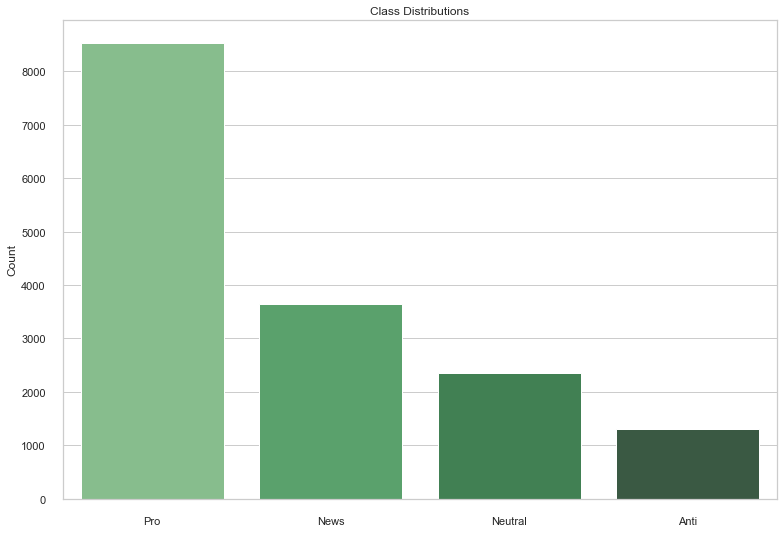

In [10]:
import seaborn as sns
# Create class distribution dataframe
class_dist = pd.DataFrame(list(train['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot class distribution
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Greens_d")
plt.title('Class Distributions')

In [11]:
# A count of each class of sentiment in the train data set
class_dist

,Count
Pro,8530
News,3640
Neutral,2353
Anti,1296


**Interpretation**

The above plot comfirms that:

* There are no missing values in the data.

* Class distribution is skewed to the 'Pro' sentiment.

* The sum of tweets relating to News, Neutral & Anti is less than half of the total tweets.

The plot shows that the highest proportion of the tweets supports the belief of man-made climate change

**Note:** The label data appears to be `unbalanced` {i.e skewed to the left "Pro" Sentiment} and it's important to have a balanced label distribution to get a better performing model.

<b>Step 3:</b> Let's count and plot the distribution of each unique value in the output label </b>Now moving on let's explore our `features` to gain more insight.</b>

In [12]:
#checking the tweetid to see if there are any duplicate id's
train['tweetid'].nunique()

15819

In [13]:
train['tweetid'].duplicated().sum()

0

<i>**Observation:** We don't have any duplicate value from the `tweetid`column </i>

<b>Step 4:</b> Moving on let's take a closer look into the `message` column which contains the tweets

In [14]:
#taking a closer look on the message column
train['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

<b>Observation:</b> Based on what we are seeing from the `message` column which contains the tweets, it shows the presence of some unwanted characters which may prove to be redundant when building our model. <br> <br>In the next section, we proceed to cleaning as required.

# Data Preprocessing & Engineering
This section aims to ensure we have clean data that will enable us have optimum results.

## Plan of action:
1. Copy the dataframe and rename the class labels for better data visualization
2. Extract hashtags and store them in separate dataframes for each class
3. Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space.
4. Tokenization
5. lemmatization

### Create  Copy

The initial step is to creat a copy so that the original dataframe is preserved .We thereafter proceed to converting the label of the classes to words they represent . This help with the visuals.

In [15]:
def update(df):
    
    """
    This function creates a copy of the original train data and 
    renames the classes, converting them from numbers to words
    
    Input: 
    df: original dataframe
        datatype: dataframe
    Output:
    df: modified dataframe
        datatype: dataframe 
        
    """

    df = train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(train)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### Hashtag Extraction
This is done before tweet cleaning to ensure no information is lost.

In [16]:
def hashtag_extract(tweet):
    
    """
    This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe 
    along with a count of how frequenty they occur
    
    Input:
    tweet: original tweets
           datatype: 'str'
           
    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe         
    """
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


### Message Cleaning

Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

In [17]:
# Convert everything to lowercase
def TweetCleaner(tweet):
     
    
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()


,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221
1,Pro,it s not like we lack evidence of anthropogeni...,126103
2,News,rt researchers say we have three years to act ...,698562
3,Pro,wired was a pivotal year in the war on climate...,573736
4,Pro,rt it s and a racist sexist climate change den...,466954


### Parts of speech tagging and lemmatization

Below function modifies the original train dataframe.A new column for the length of each tweet is added.
The tweets are then tokenized and each word is assigned a part of speech tag before being lemmatized.

In [18]:
def lemma(df):
       
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

           

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


### Word frequency
Creating separate dataframes to store the 25 most frequent words and their respective frequencies for each class. Once this information has been extracted we will use these words to create wordclouds for each class.

Word clouds help us visualize and gain a better understanding of what is being said in each class.

In [19]:
def frequency(tweet):
    
    """
    This function determines the frequency of each word in a collection of tweets 
    and stores the 25 most frequent words in a dataframe, 
    sorted from most to least frequent
    
    Input: 
    tweet: original tweets
           datatype: 'str'
           
    Output: 
    frequency: dataframe containing the top 25 words 
               datatype: dataframe          
    """
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

In [20]:
# Extract the words in the tweets for the pro and anti climate change classes 
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500,
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_frequency.tail()

,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


# Exploratory data analysis

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


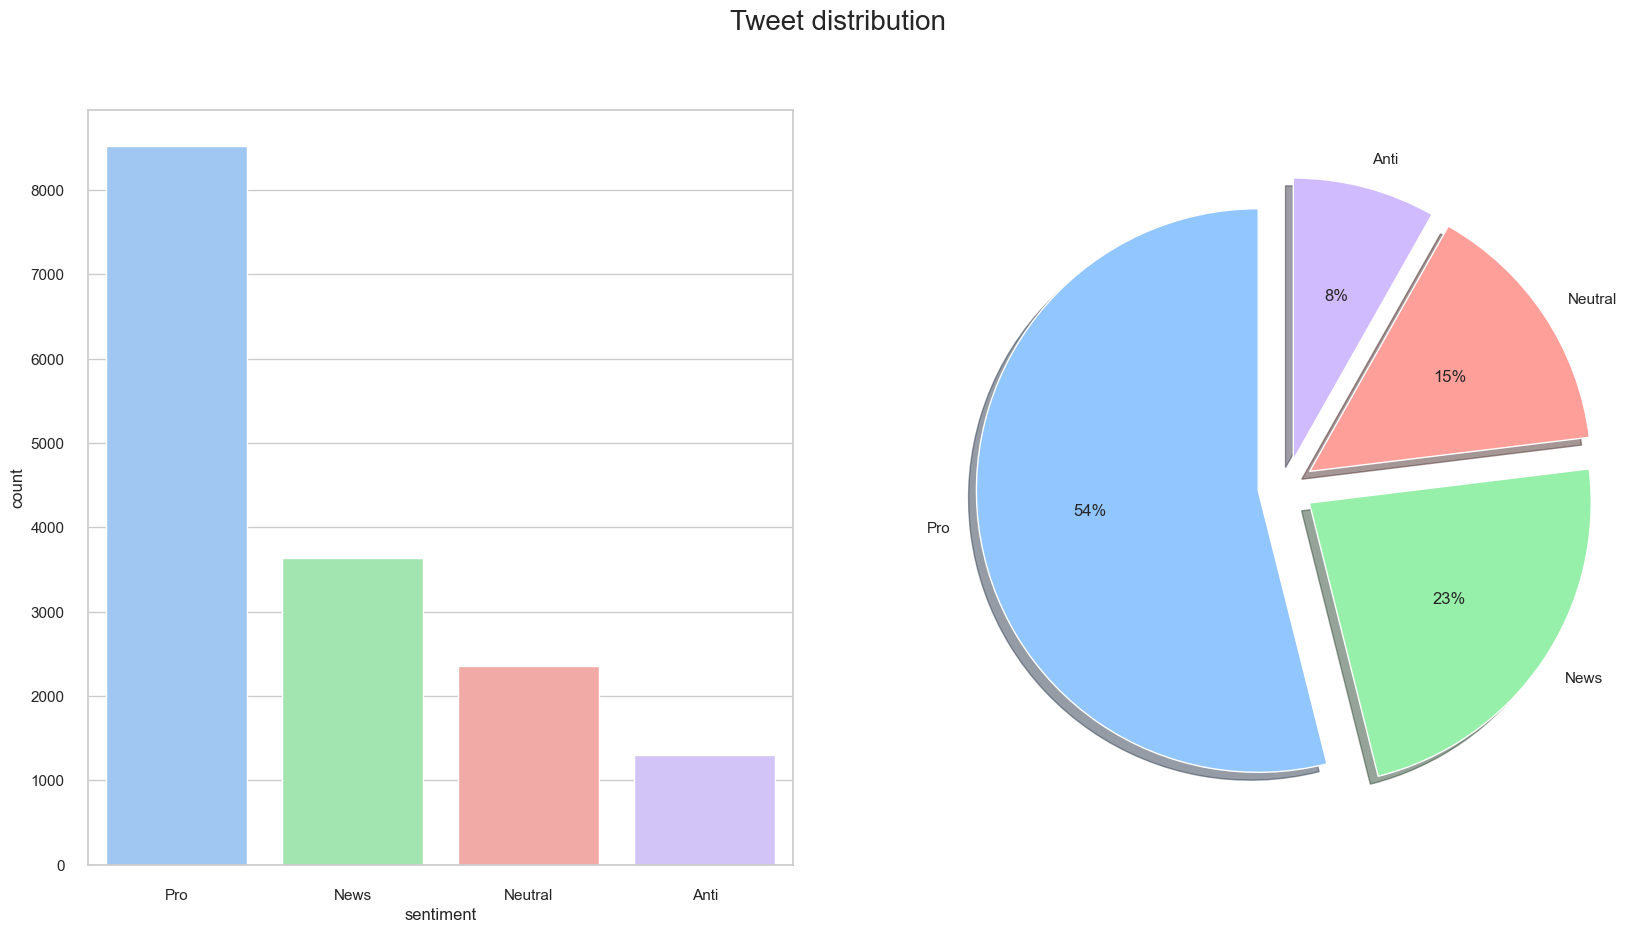

In [21]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

As had we had seen earlier when we took a closer look at the distribution of the tweets we notice that the data is severely imbalanced with the majority of tweets falling in the 'pro' category, supporting the belief of man-made climate change.

### Tweet length distribution

From the plots below it is evident tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. We also notice that neutral climate change tweets tend to have the most variability in tweet length.

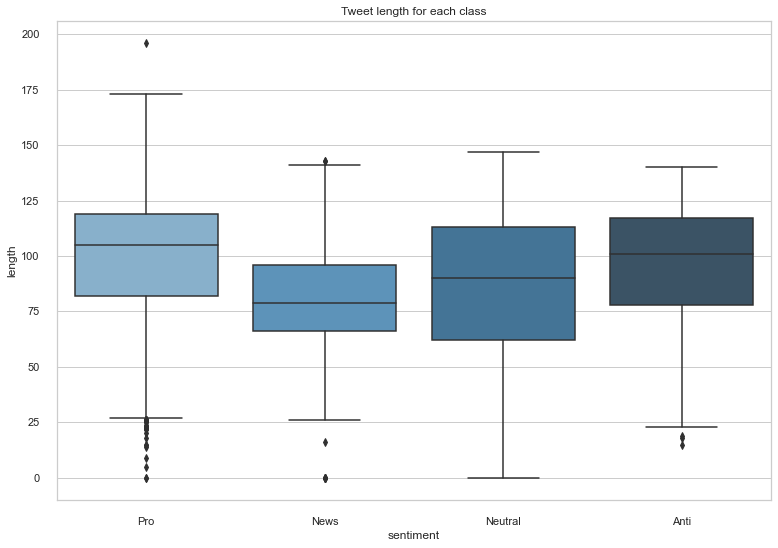

In [22]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

### Most Common Words
The figures below display the 25 most common words found in the messages for each classes.

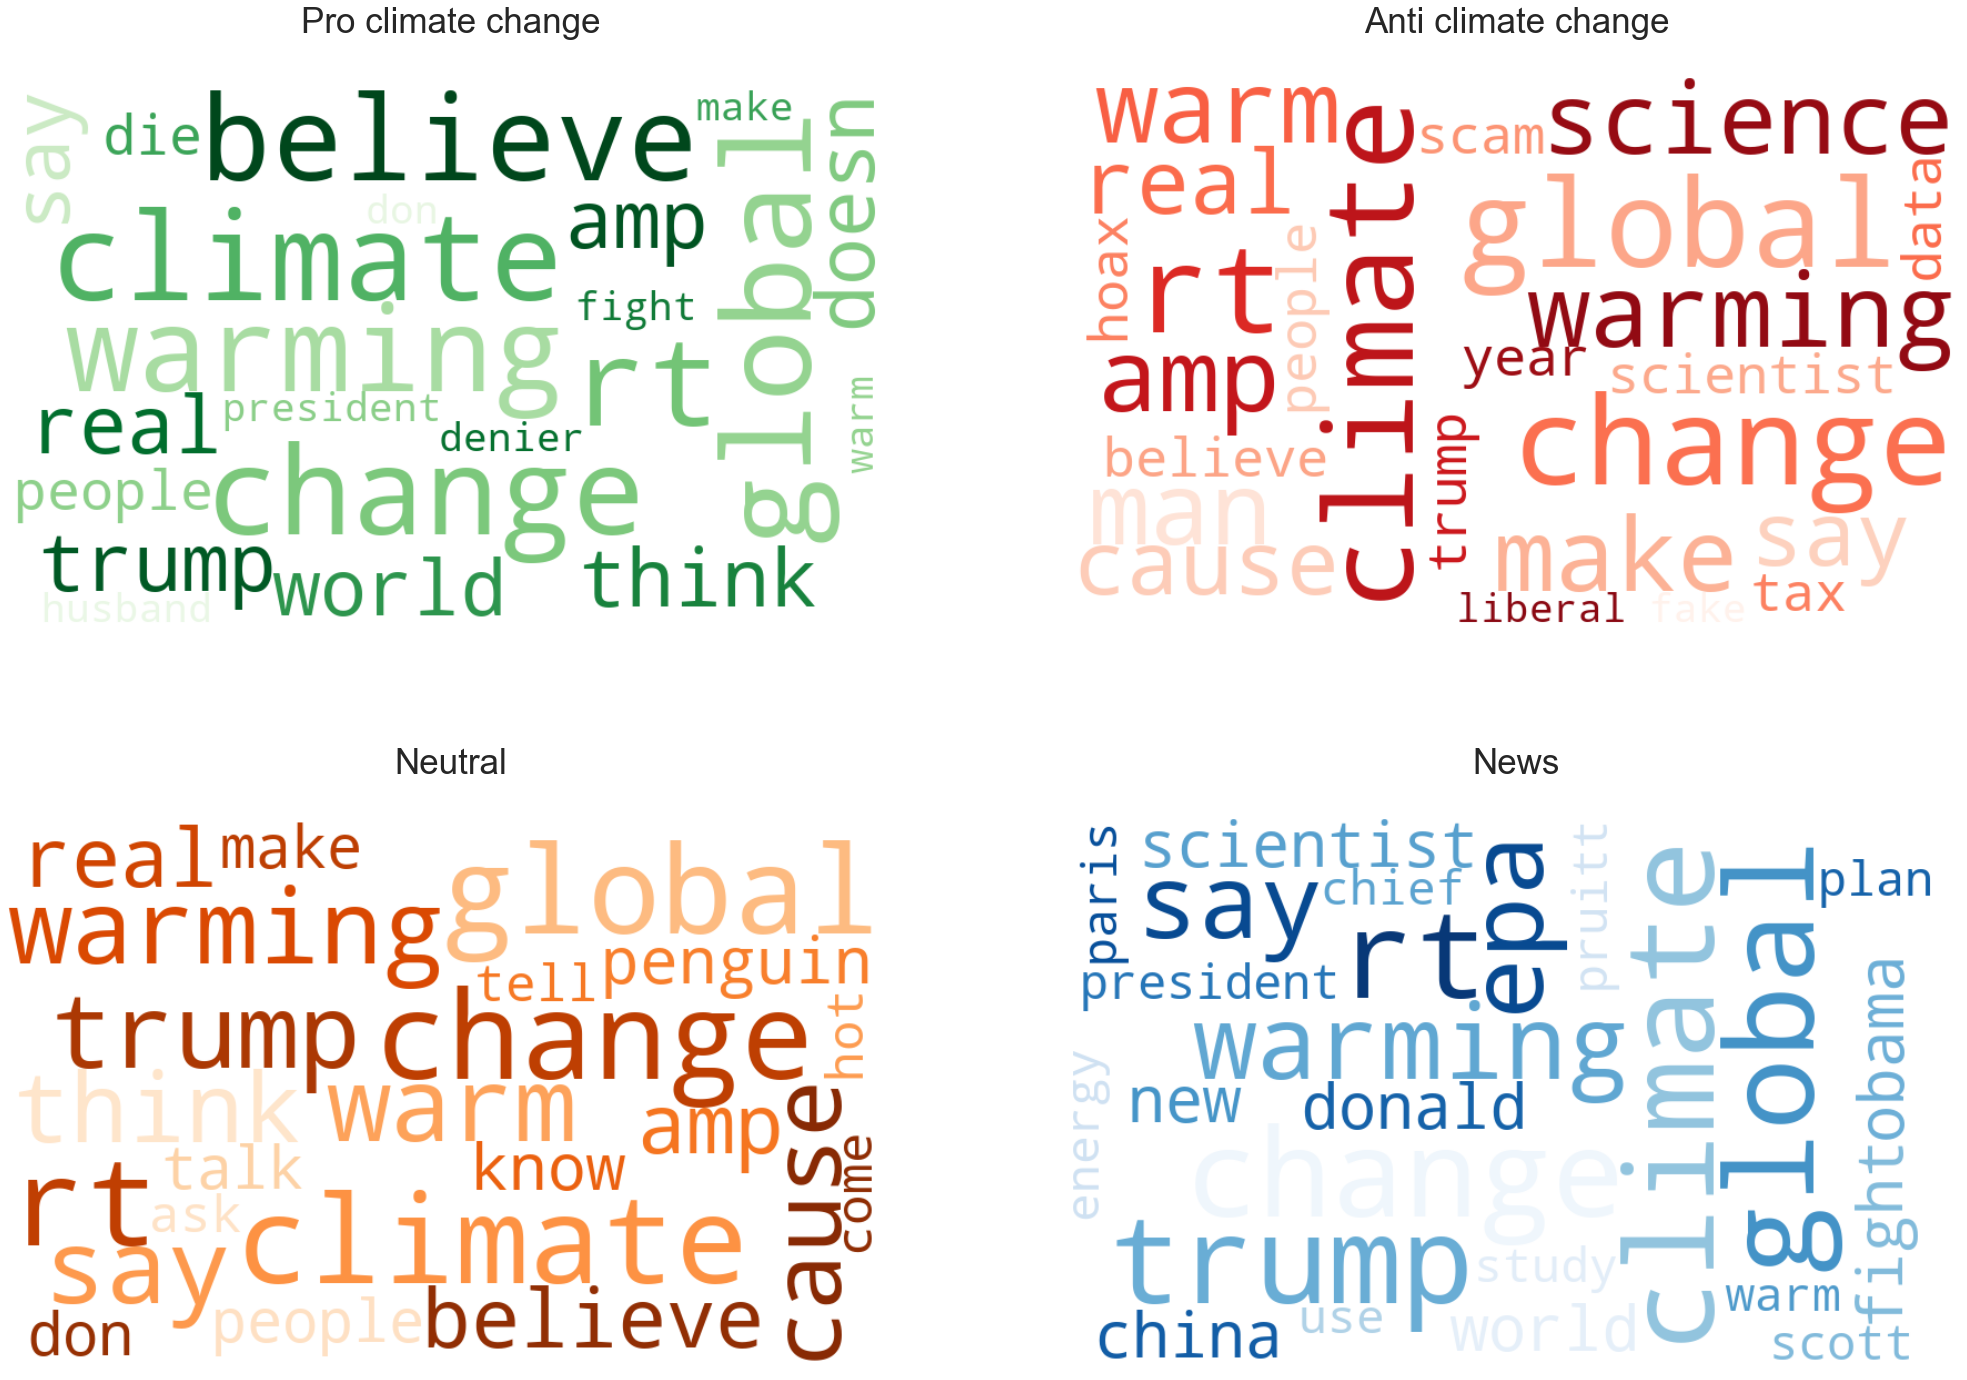

Pro climate change buzzwords 20-25 shown here for clarity 
- The wordcloud doesn't seem to pick up on 'http'


,word,freq
20,http,359
21,make,322
22,like,318
23,warm,313
24,husband,312


In [23]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
display(pro_frequency.tail())

#### Observations:
1. The top 3 common words accross all classes are climate change and rt (retweet). The frequency of rt ( Retweet ) means that a lot of the same information and/or opinions are being shared and viewed by large audiences. This is true for all 4 classes

2. 'Trump' is a frequently occuring word in all 4 classes. 

3. Words like real, believe, think, fight, etc. occur frequently in pro climate change tweets. In contrast, anti climate change tweets contain words such as 'hoax', 'scam', 'tax', 'liberal' and 'fake'. There is a stark difference in tone and use of emotive language in these 2 sets of tweets. From this data we could reason that people who are anti climate change believe that global warming is a 'hoax'.

4. words like 'science' and 'scientist' occur frequently as well which could imply that people are tweeting about scientific studies that support their views on climate change.

5. https occurs frequently in pro climate change tweets, implying that many links are being shared around the topic of climate change. These could be links to petitions, websites and/or articles related to climate change. Interesting to note: https only occurs in the top 25 words for the pro climate change class.

#### Hashtags
Hashtags are a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

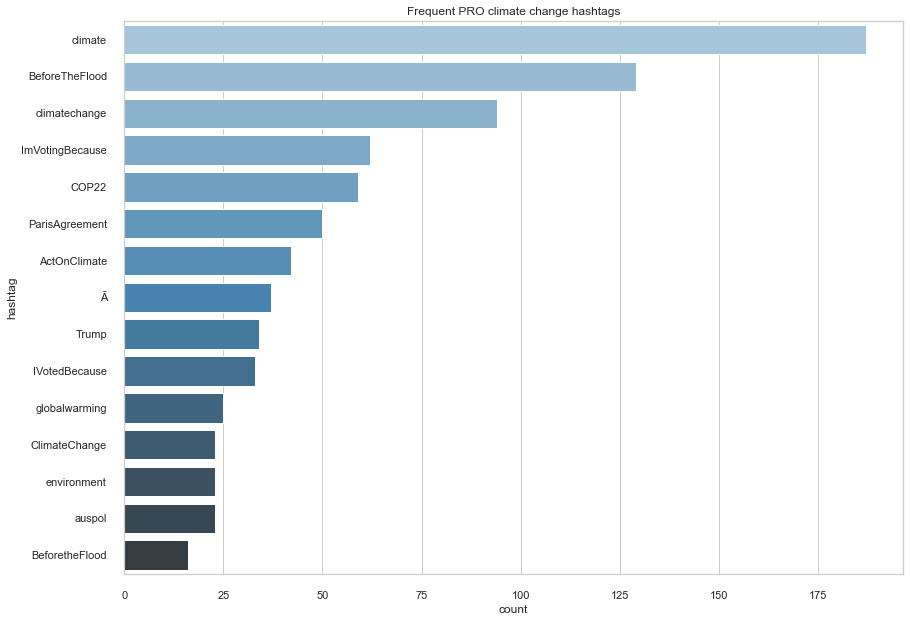

In [24]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()


From the above ,It is evident the word climate is the most pro climate change hashtag.

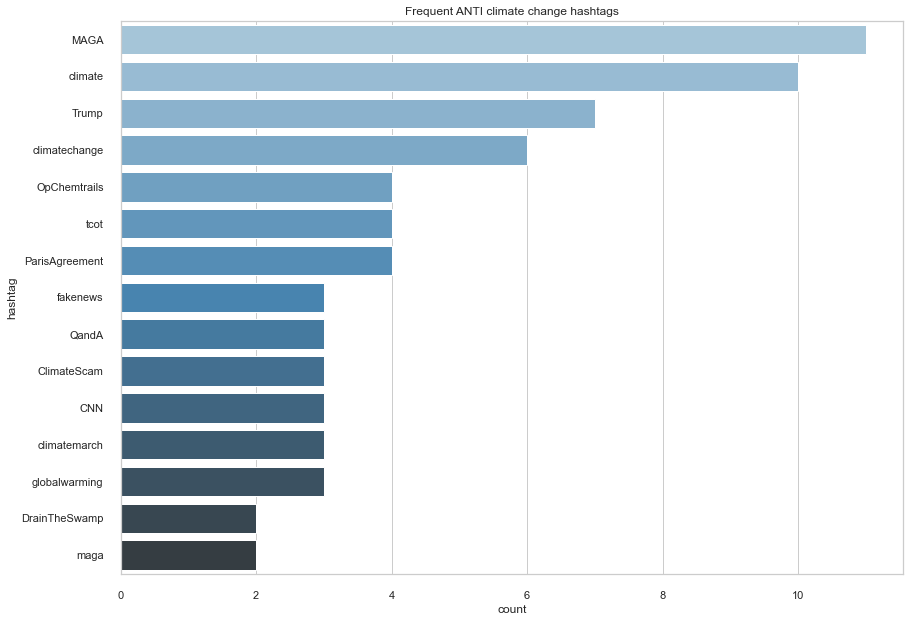

In [25]:
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("Blues_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

From the above ,It is evident the word maga is the most anti climate change hashtag. This is also due to the fact that Donald Trump was not a supporter of pro climate change initiatives.

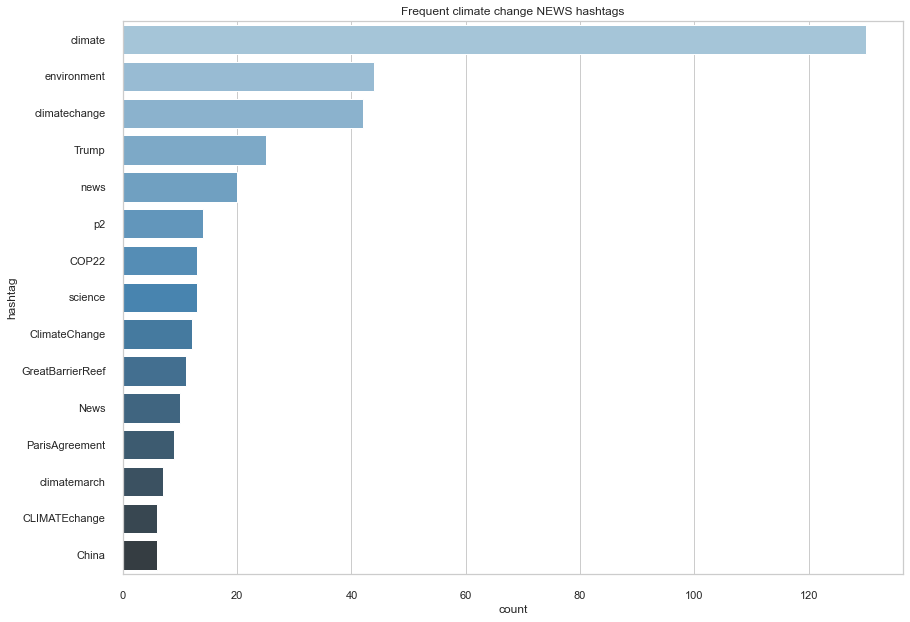

In [26]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

The hashtags in the news category are less emotive and aim to bring awareness to high profile topics related to climate change that are or were trending in the news. Examples of such hashtags include News and Science which would be used to indicate that the tweet contains information from a news outlet or a scientific study.

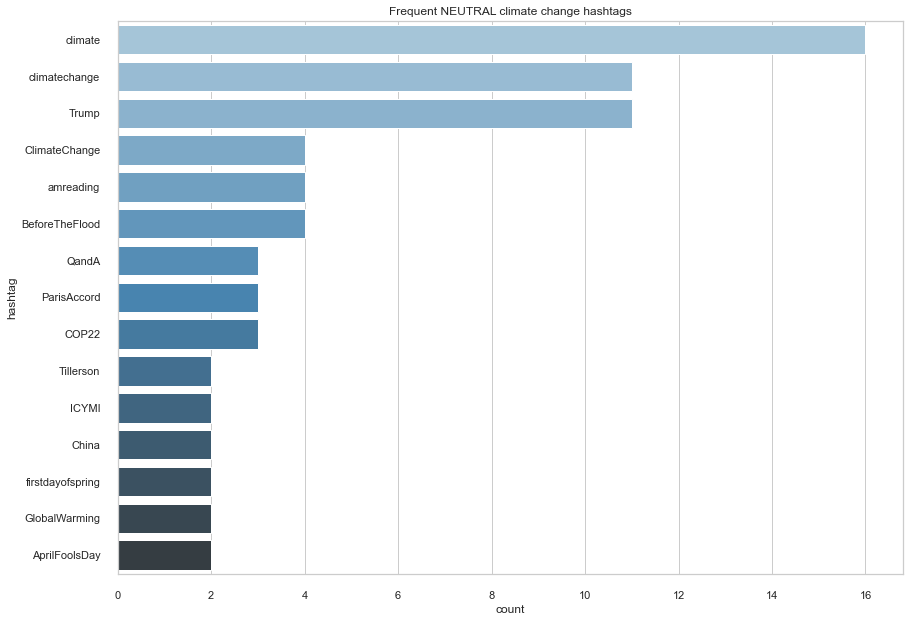

In [27]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

In general neutral climate change tweets have hashtags that are not as polarized as the anti and pro hashtags.

# Building Classification Models

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following 5 models will be considered:

1. Random forest
2. Naive Bayes
3. K nearest neighbors
4. Logistic regression
5. Linear SVC

#### Train - Validation split


In [28]:
# Split the dataset into train & validation (25%) for model training

# Seperate features and tagret variables
X = train['message']
y = train['sentiment']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

#### Pipelines

The pipelines consist of 2 steps, vectorization and model fitting.

In [29]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])
# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

#### Train the models
The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [30]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)
# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

COMET ERROR: Failed to extract parameters from estimator


# Model Evaluation

#### Random Forest

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       0.00      0.00      0.00       547
           1       0.55      1.00      0.71      2178
           2       0.00      0.00      0.00       894

    accuracy                           0.55      3955
   macro avg       0.14      0.25      0.18      3955
weighted avg       0.30      0.55      0.39      3955



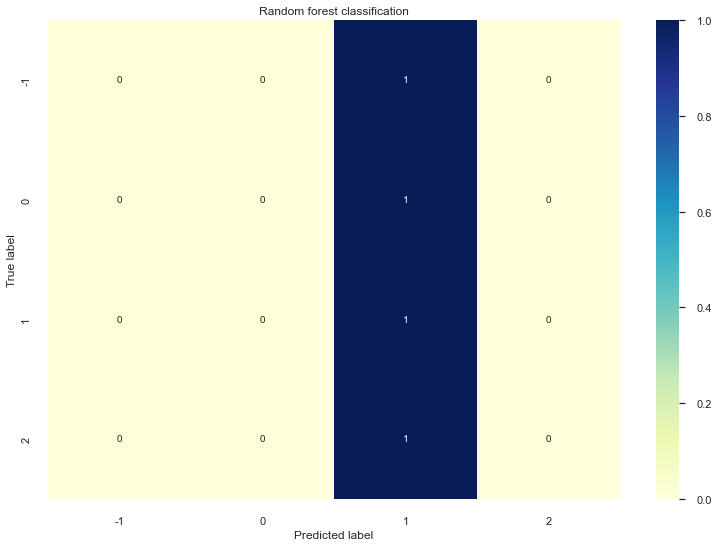

In [31]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})
# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Naive Bayes

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       1.00      0.05      0.09       547
           1       0.60      0.99      0.75      2178
           2       0.94      0.33      0.48       894

    accuracy                           0.63      3955
   macro avg       0.63      0.34      0.33      3955
weighted avg       0.68      0.63      0.53      3955



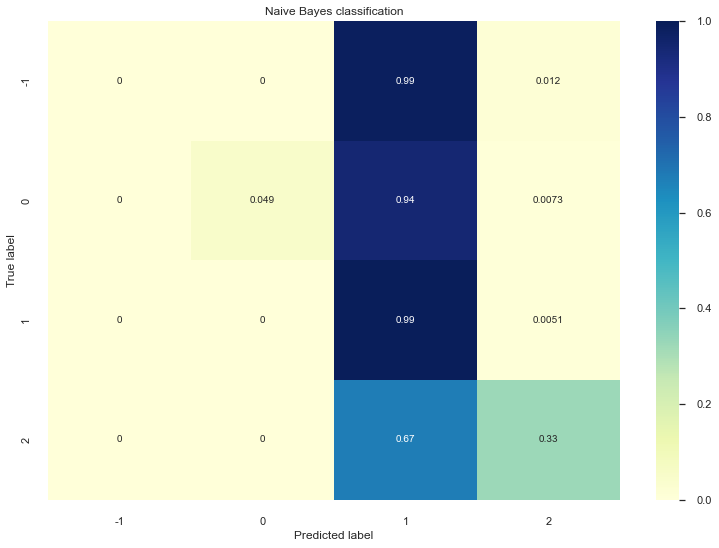

In [32]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_valid, y_pred_nb))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### K nearest neighbors

              precision    recall  f1-score   support

          -1       0.56      0.40      0.47       336
           0       0.48      0.39      0.43       547
           1       0.74      0.81      0.77      2178
           2       0.68      0.66      0.67       894

    accuracy                           0.69      3955
   macro avg       0.62      0.57      0.59      3955
weighted avg       0.67      0.69      0.68      3955



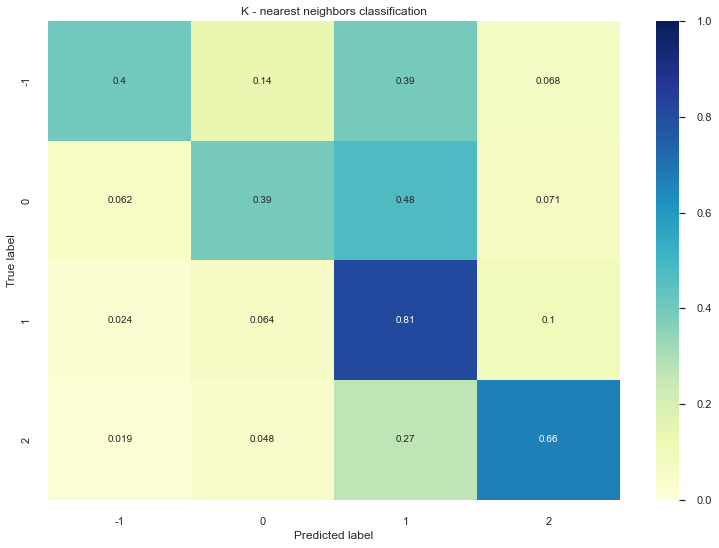

In [33]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})
# Adding headings and lables
plt.title('K - nearest neighbors classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Logistic regression

              precision    recall  f1-score   support

          -1       0.55      0.66      0.60       336
           0       0.50      0.56      0.53       547
           1       0.86      0.69      0.77      2178
           2       0.65      0.88      0.75       894

    accuracy                           0.71      3955
   macro avg       0.64      0.70      0.66      3955
weighted avg       0.74      0.71      0.72      3955



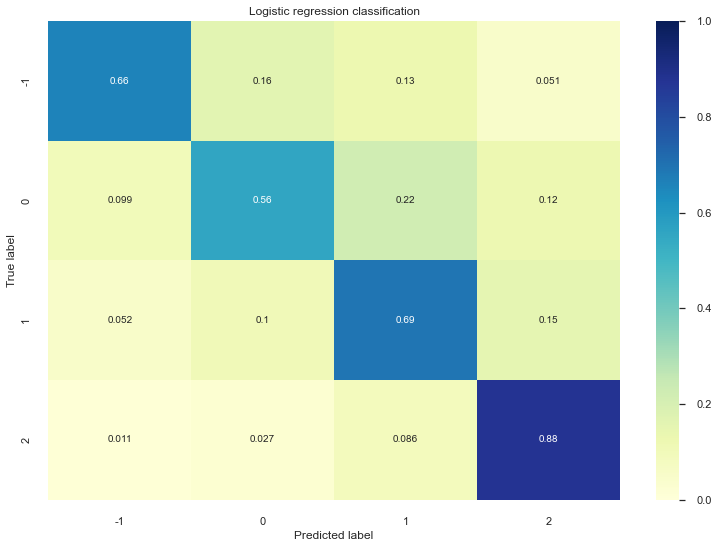

In [34]:
# Generate a classification Report for the model
print(metrics.classification_report(y_valid, y_pred_lr))

cm = confusion_matrix(y_valid, y_pred_lr)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Linear SVC

              precision    recall  f1-score   support

          -1       0.63      0.57      0.60       336
           0       0.57      0.49      0.53       547
           1       0.82      0.80      0.81      2178
           2       0.71      0.84      0.77       894

    accuracy                           0.75      3955
   macro avg       0.68      0.68      0.68      3955
weighted avg       0.74      0.75      0.74      3955



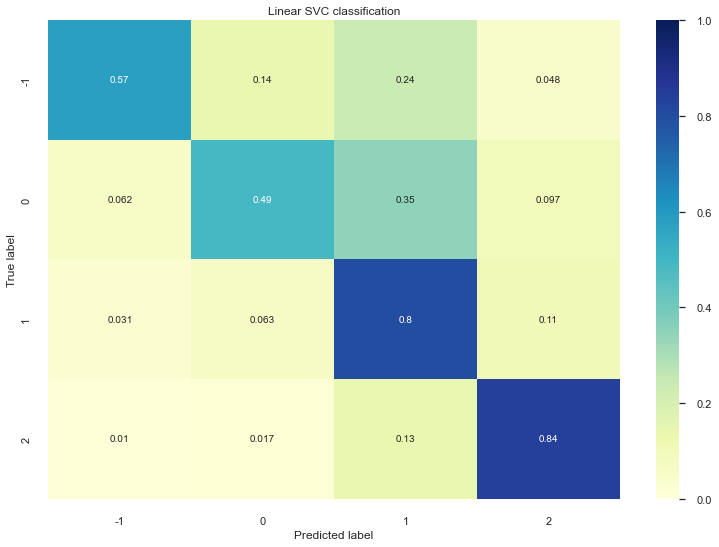

In [35]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_valid, y_pred_lsvc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})
# Adding headings and lables
plt.title('Linear SVC classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

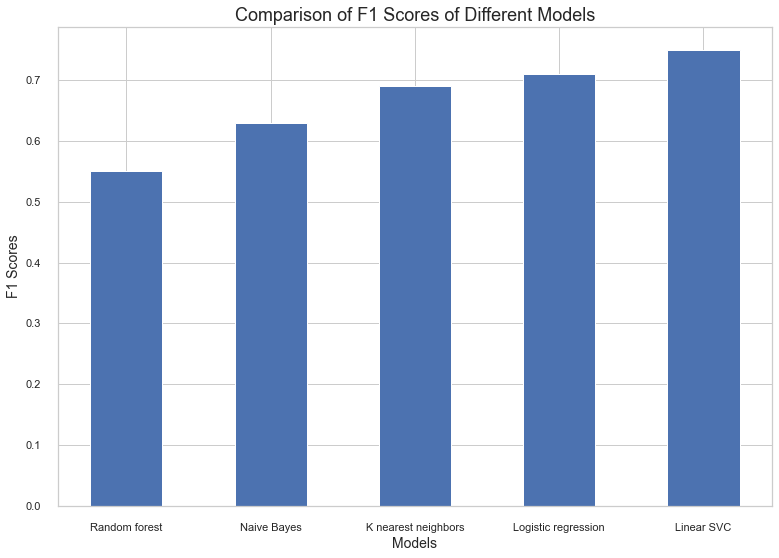

In [45]:
import matplotlib.pyplot as plt

models = ['Random forest', 'Naive Bayes','K nearest neighbors','Logistic regression','Linear SVC']
f1_scores = [0.55,0.63,0.69,0.71,0.75]


plt.bar(models, f1_scores, color = 'b', width=0.5, label=models)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.title('Comparison of F1 Scores of Different Models', fontsize=18)
plt.show()

# Model Selection
1. Linear SVC is able to successfully classify the tweets.
2. This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class compared to the first 3 models.
3. This model shows a higher degree of confusion surrounding the pro class compared to logistic regression.
4. This, however, leads to an increase in the precision, accuracy and f1 score for the pro class which makes up the majority of the tweets.
5. Linear SVC has achieved the highest F1 score of 0.75

### Linear SVC has achieved the highest F1 score of 0.75 and is therefore our model of choice.

# Hyperparameter tuning
Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.

After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.

In [38]:
# This code is intentionally commented out - Code takes >10 minutes to run. 

# Set ranges for the parameters that we want to tune
params = {'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5],
          'tfidf__ngram_range' : [(1,1),(1,2)],
          'clf__max_iter': [1500, 2000, 2500, 3000],
          'tfidf__min_df': [2, 3, 4],
          'tfidf__max_df': [0.8, 0.9]}
# Perform randomized search & extract the optimal parameters
Randomized = RandomizedSearchCV(lsvc, param_distributions=params, cv=5, scoring='accuracy', n_iter=5, random_state=42)
Randomized.fit(X_train,y_train)
Randomized.best_estimator_

#text_clf_lsvc
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), 
      '%')


F1 score improved by 2.0 %


test = pd.read_csv('test.csv')
y_test = lsvc_op.predict(test['message'])
output = pd.DataFrame({'tweetid': test.tweetid,
                       'sentiment': y_test})
output.to_csv('submission.csv', index=False)
output

### Saving the Model in Pickle format

In [39]:
# save the model to disk
import pickle
filename = 'lsvc_op.pkl'
pickle.dump(lsvc_op, open(filename, 'wb'))
 

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.7587863463969658


In [40]:
# save the model to disk
import pickle
filename = 'Naive Bayes.pkl'
pickle.dump(nb, open(filename, 'wb'))
 

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.6285714285714286


In [41]:
# save the model to disk
import pickle
filename = 'Random forest.pkl'
pickle.dump(rf, open(filename, 'wb'))
 

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.5506953223767383


In [42]:
# save the model to disk
import pickle
filename = 'K nearest neighbors.pkl'
pickle.dump(knn, open(filename, 'wb'))
 

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.6852085967130215


In [43]:
# save the model to disk
import pickle
filename = 'Logistic regression.pkl'
pickle.dump(lr, open(filename, 'wb'))
 

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.7120101137800253


# End Comet experiment

In [44]:

# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}
           
params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/odenyor/teammh1-exploreal/d6f5abfefb874a47804a53cd38510bad
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7572932892669649
COMET INFO:     precision : 0.7587664684840852
COMET INFO:     recall    : 0.7587863463969658
COMET INFO:   Parameters:
COMET INFO:     C                                 : 0.3
COMET INFO:     algorithm                         : auto
COMET INFO:     alpha                             : 1.0
COMET INFO:     bootstrap                         : True
COMET INFO:     ccp_alpha                         : 0.0
COMET INFO:     class_prior                       : 1
COMET INFO:     class_weight                      : balanced
COMET INFO:     classifier                        : linear SVC
COMET INFO:     clf                            

COMET INFO:     intercept_scaling                 : 1
COMET INFO:     l1_ratio                          : 1
COMET INFO:     leaf_size                         : 30
COMET INFO:     loss                              : squared_hinge
COMET INFO:     max_depth                         : 5
COMET INFO:     max_df                            : 0.8
COMET INFO:     max_features                      : sqrt
COMET INFO:     max_iter                          : 3000
COMET INFO:     max_leaf_nodes                    : 1
COMET INFO:     max_samples                       : 1
COMET INFO:     memory                            : 1
COMET INFO:     metric                            : minkowski
COMET INFO:     metric_params                     : 1
COMET INFO:     min_df                            : 2
COMET INFO:     min_impurity_decrease             : 0.0
COMET INFO:     min_samples_leaf                  : 1
COMET INFO:     min_samples_split                 : 2
COMET INFO:     min_weight_fraction_leaf          :

# Conclusion

Based on the evidence above it is clear mojority of the people perceive and believe climate change is a real threat. 
The Value prepostion of the insights range from;

1. Market research: Companies can analyze public sentiment towards their brand, products, services, or competitors in order to make better decisions about their products and services.

2. Product/Service Improvement: Companies can use sentiment analysis to identify user pain points and areas of improvement, allowing them to enhance their offerings.

3. Customer Service: Companies can use sentiment analysis of customer tweets to identify unhappy customers and respond to them quickly in order to improve customer satisfaction.

4. Competitive Analysis: Companies can use sentiment analysis to compare their brand to competitors, allowing them to differentiate their offering and gain a competitive edge.

5. Advertising: Companies can use sentiment analysis to understand which ads are resonating with their target audience and adjust their ad campaigns accordingly.

# References


Kashyap, A. (2017). Top 5 tricks to make plots look better. [online] Medium. Available at: https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08 [Accessed 17 Jun. 2020].

Stack Abuse. (n.d.). Python for NLP: Parts of Speech Tagging and Named Entity Recognition. [online] Available at: https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/ [Accessed 17 Jun. 2020].

Dr. Sebastian Raschka. (2014). Turn Your Twitter Timeline into a Word Cloud. [online] Available at: https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html [Accessed 17 Jun. 2020].

matplotlib.org. (n.d.). Basic pie chart — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py [Accessed 17 Jun. 2020].

Beri, A. (2020). Stemming vs Lemmatization. [online] Medium. Available at: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221 [Accessed 17 Jun. 2020]

kaggle.com. (n.d.). Create Table of Contents in a Notebook. [online] Available at: https://www.kaggle.com/dcstang/create-table-of-contents-in-a-notebook [Accessed 18 Jun. 2020].

Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

www.javatpoint.com. (n.d.). Support Vector Machine (SVM) Algorithm - Javatpoint. [online] Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm [Accessed 18 Jun. 2020].

R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].

SUNIL RAY. (2017) [online] Available at: Understanding Support Vector Machine(SVM) algorithm from examples (along with code) https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ [Accessed 18 June 2020]

